## For Anne

First download and install numpy, seaborn, pandas and scipy.

Then simple exercises.

DATACAMP COURSES ARE GREAT!

In [129]:
import numpy as np
import pandas as pd
import scipy
import sys
import math
from scipy.optimize import curve_fit
from lmfit import Model

# for plotting
import matplotlib.pyplot as plt
import matplotlib as mplib
from matplotlib import rc
import seaborn as sns

## 2. show matlplotlib output in notebook
%matplotlib inline

In [130]:
x = 5

### Types: Lists, numpy arrays, dictionaries

In [131]:
my_list = [1,2,3,4] 

In [132]:
my_list * 3

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

For mathematical expressions use numpy

In [133]:
first_array = np.array(my_list)

In [134]:
print(first_array*3)

[ 3  6  9 12]


In [135]:
# Get the first element from an array
x = first_array[0]
print(x)

1


Dictionaries have key value pairs: The order of the keys change, so if you want an element call by key.

In [136]:
pop_unemp = {"Germany": [80000000, 4], "Belgium": [10000000, 20] }

In [137]:
pop_unemp["Germany"]

[80000000, 4]

### Writing a function

In [138]:
def doub_trip(x):
    double_x = x*2
    triple_x = x*3
    return double_x,triple_x

In [139]:
doub,trip = doub_trip(5)
print("double of 5 =",doub)
print("triple of 5 =",trip)

('double of 5 =', 10)
('triple of 5 =', 15)


#### FOR LOOP

In [140]:
for i in range(10):
    if i<11:
        j = i**2
        print(j)
    

0
1
4
9
16
25
36
49
64
81


## LOADING DATA

In [141]:
def read_data_in(file_in,column_list,lines):
    """Function to quickly read a number of lines from Excel and 
    rename the columns for each data"""
    indat = pd.read_excel(file_in)
    indat = indat.loc[0:lines]
    indat.columns = column_list
    return indat

In [142]:
# Setting column names
# External Debt data
ext_debt_col = ["Date","Total_Debt","Short","Long_4A","Long_State_Owned",\
                        "Long_4B","Private","Financial_Inst","Finance_woBanks",\
                        "Private_Invest","Commercial_Banks","Official","Governmental",\
                        "International","IMF","Other_international"]

ext_debt_in = read_data_in('EVDS_disborc.xlsx', ext_debt_col, 28)

#####
# original column names
print(ext_debt_in.iloc[0:2,:])

# after changin col names
ext_debt_in.columns = ext_debt_col
print(ext_debt_in.iloc[0:2,:])



   Date Total_Debt Short  Long_4A  Long_State_Owned  Long_4B  Private  \
0  1989      43911  5745  38166.0           29446.0  38166.0  17780.0   
1  1990      52381  9500  42881.0           33268.0  42881.0  19807.0   

   Financial_Inst  Finance_woBanks  Private_Invest  Commercial_Banks  \
0         10831.0           2639.0            28.0            8158.0   
1         12154.0           2823.0            22.0            9282.0   

   Official  Governmental  International   IMF  Other_international  
0   17825.0        9046.0         8779.0  48.0               3040.0  
1   19758.0        9810.0         9948.0   0.0               3838.0  
   Date Total_Debt Short  Long_4A  Long_State_Owned  Long_4B  Private  \
0  1989      43911  5745  38166.0           29446.0  38166.0  17780.0   
1  1990      52381  9500  42881.0           33268.0  42881.0  19807.0   

   Financial_Inst  Finance_woBanks  Private_Invest  Commercial_Banks  \
0         10831.0           2639.0            28.0           

### Subsetting pandas data frame

In [143]:
#version 1, to get an array
my_vec= ext_debt_in["Date"]
print("version1 = ", type(my_vec))

# version 2
my_vec2 = ext_debt_in[["Date"]]
print("version2 = ",type(my_vec2))

# version 3 // iloc
my_df1 = ext_debt_in.iloc[0:10,3:6]
print(my_df1.head(2))

('version1 = ', <class 'pandas.core.series.Series'>)
('version2 = ', <class 'pandas.core.frame.DataFrame'>)
   Long_4A  Long_State_Owned  Long_4B
0  38166.0           29446.0  38166.0
1  42881.0           33268.0  42881.0


### Nice things about PANDAS

Here, reading it new data to show something.


In [144]:
# Import - Export - Consumer Prices
imp_exp_col = ["Date","Living","Health","Education","Food_Drinks","Food",\
                        "Export","Import","Invest_export","Invest_import",\
                        "Consume_export","Consume_Import"]

imp_exp_in  = read_data_in('EVDS_ithalat_ihracat.xlsx', imp_exp_col, 149)
#imp_exp_in.info()
imp_exp_in.head(5)


,Date,Living,Health,Education,Food_Drinks,Food,Export,Import,Invest_export,Invest_import,Consume_export,Consume_Import
0,2005-12,126.06,111.75,140.69,116.08,115.70,7246.279,11682.578,752.180,2372.985,3404.019,1558.103
1,2006-01,127.66,112.47,140.73,117.61,117.28,5133.049,8145.534,501.481,1340.089,2210.229,844.001
2,2006-02,129.22,113.22,140.70,120.44,120.25,6058.251,9796.220,632.304,1583.855,2801.132,1294.246
3,2006-03,130,113.64,140.91,122.00,121.91,7411.102,11605.026,819.647,1960.095,3348.993,1516.396
4,2006-04,130.27,113.96,141.07,122.75,122.69,6456.090,11587.101,742.248,1932.196,2932.833,1425.378


In [145]:
# Let's clean the month info and keep years.

imp_exp_in["Date"] = imp_exp_in["Date"].str.split('-',n=1, expand = True)[0]
imp_exp_in.head(2)

,Date,Living,Health,Education,Food_Drinks,Food,Export,Import,Invest_export,Invest_import,Consume_export,Consume_Import
0,2005,126.06,111.75,140.69,116.08,115.70,7246.279,11682.578,752.180,2372.985,3404.019,1558.103
1,2006,127.66,112.47,140.73,117.61,117.28,5133.049,8145.534,501.481,1340.089,2210.229,844.001


In [146]:
#imp_exp_in["Date"] = pd.to_numeric(imp_exp_in["Date"])

# APPLY: Great function to know
imp_exp_in.mean()
type(imp_exp_in)



pandas.core.frame.DataFrame

### AGGRGATE COLUMN WITH FUNCTION MEAN

In [147]:
imp_exp_in = imp_exp_in.groupby(["Date"]).mean()
#imp_exp_in = imp_exp_in.reset_index()
imp_exp_in.head()

# NOW LOC INSTEAD OF ILOC
subset = imp_exp_in.loc["2005":"2008","Food": "Export"]
subset.head()

,Food,Export
Date,,
2005,115.700000,7246.279000
2006,122.678333,7127.889500
2007,138.230833,8939.312000
2008,156.312500,11002.265833


In [148]:
# Getting date back from being an index to a column name
imp_exp_in = imp_exp_in.reset_index()
imp_exp_in.head()


,Date,Education,Food_Drinks,Food,Export,Import,Invest_export,Invest_import,Consume_export,Consume_Import
0,2005,140.690000,116.080000,115.700000,7246.279000,11682.578000,752.180000,2372.985000,3404.019000,1558.103000
1,2006,145.649167,122.945000,122.678333,7127.889500,11631.347250,785.280583,1945.629167,3149.206333,1343.027000
2,2007,156.143333,138.210833,138.230833,8939.312000,14171.892333,1146.211583,2254.535583,3641.321917,1557.837167
3,2008,166.695833,155.884167,156.312500,11002.265833,16830.297417,1393.781083,2335.054917,3923.075250,1790.769167
4,2009,176.365833,168.387500,168.870833,8511.883833,11744.034583,926.402167,1788.568167,3394.418583,1607.475167


In [149]:
# write a subset to excel

In [150]:
print(imp_exp_in.describe())
imp_exp_in.head()


        Education  Food_Drinks        Food        Export        Import  \
count   14.000000    14.000000   14.000000     14.000000     14.000000   
mean   215.647702   223.624833  225.293488  10918.456207  16904.610029   
std     60.695682    84.753823   86.206040   2257.001091   3500.932890   
min    140.690000   116.080000  115.700000   7127.889500  11631.347250   
25%    169.113333   159.010000  159.452083   9077.050938  14494.426063   
50%    201.865833   206.135833  207.488333  11559.851958  17049.913458   
75%    255.391667   285.519375  289.084375  12691.412938  19980.627979   
max    329.052000   381.476000  385.238000  13861.812400  20971.770250   

       Invest_export  Invest_import  Consume_export  Consume_Import  
count      14.000000      14.000000       14.000000       14.000000  
mean     1193.880294    2603.022980     4408.227969     2065.272940  
std       260.141846     423.582999      858.723905      407.728874  
min       752.180000    1788.568167     3149.206333  

,Date,Education,Food_Drinks,Food,Export,Import,Invest_export,Invest_import,Consume_export,Consume_Import
0,2005,140.690000,116.080000,115.700000,7246.279000,11682.578000,752.180000,2372.985000,3404.019000,1558.103000
1,2006,145.649167,122.945000,122.678333,7127.889500,11631.347250,785.280583,1945.629167,3149.206333,1343.027000
2,2007,156.143333,138.210833,138.230833,8939.312000,14171.892333,1146.211583,2254.535583,3641.321917,1557.837167
3,2008,166.695833,155.884167,156.312500,11002.265833,16830.297417,1393.781083,2335.054917,3923.075250,1790.769167
4,2009,176.365833,168.387500,168.870833,8511.883833,11744.034583,926.402167,1788.568167,3394.418583,1607.475167


### Write to Excel


In [151]:
imp_exp_in.to_excel("Excel_from_jupyter.xlsx")


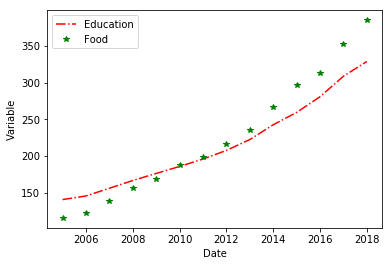

In [153]:
#plot
X=imp_exp_in["Date"]
Y=imp_exp_in["Education"]
Y2=imp_exp_in["Food"]

plt.plot(X,Y, '-.r')
plt.plot(X,Y2, '*g')
plt.xlabel("Date")
plt.ylabel("Variable")
plt.legend()